In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv('/content/drive/MyDrive/google_apper/sale_forcasting _and _predictive _analysis/sale_forcasting.csv')

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


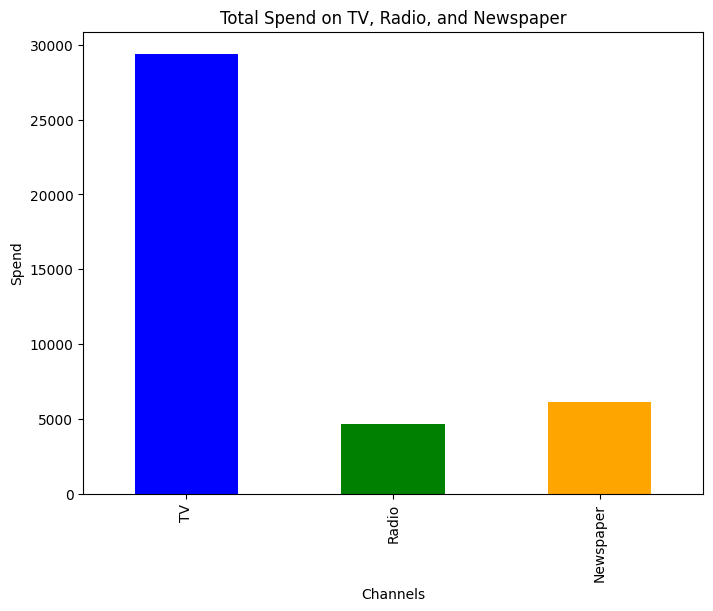

In [10]:
#To compare the total spending on TV, Radio, and Newspaper
total_spend=data[['TV', 'Radio', 'Newspaper']].sum()
# Plotting the bar chart
plt.figure(figsize=(8,6))
total_spend.plot(kind='bar',color=['blue', 'green', 'orange'])
plt.title('Total Spend on TV, Radio, and Newspaper')
plt.ylabel('Spend')
plt.xlabel('Channels')
plt.show()

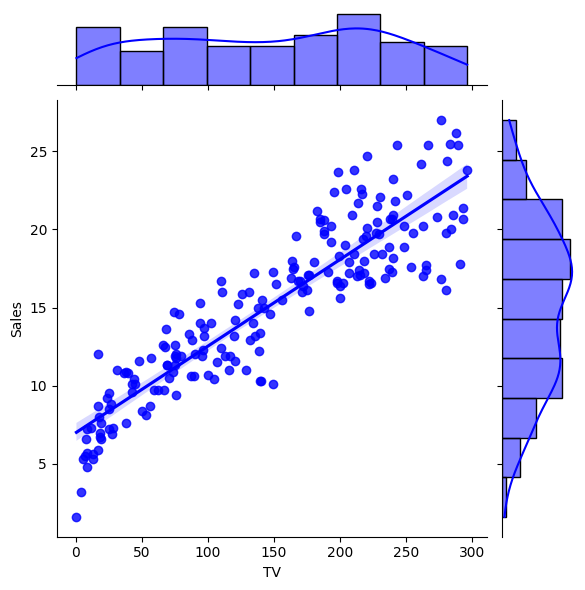

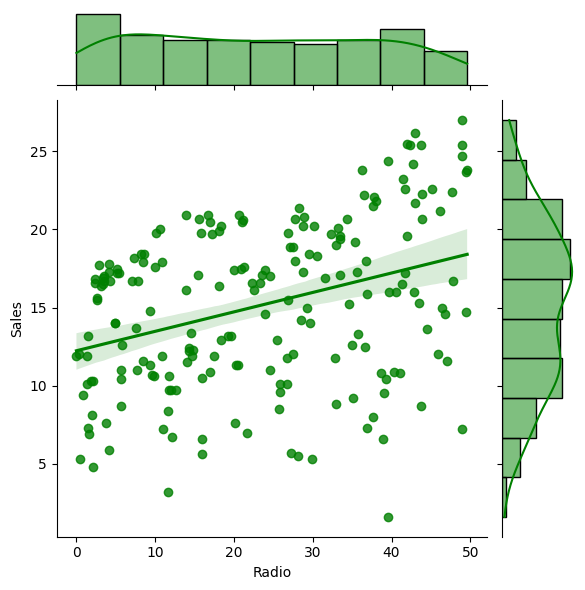

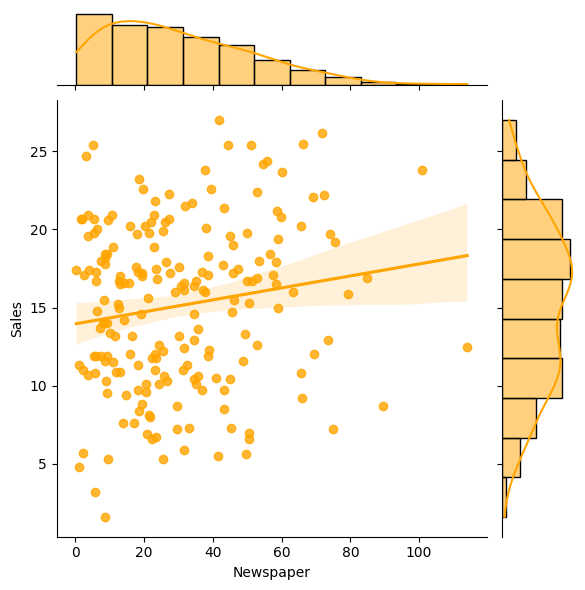

In [11]:
import seaborn as sns


# Joint plot for TV vs Sales
sns.jointplot(data=data, x='TV', y='Sales', kind='reg', color='blue')

# Joint plot for Radio vs Sales
sns.jointplot(data=data, x='Radio', y='Sales', kind='reg', color='green')

# Joint plot for Newspaper vs Sales
sns.jointplot(data=data, x='Newspaper', y='Sales', kind='reg', color='orange')

plt.show()


<Axes: >

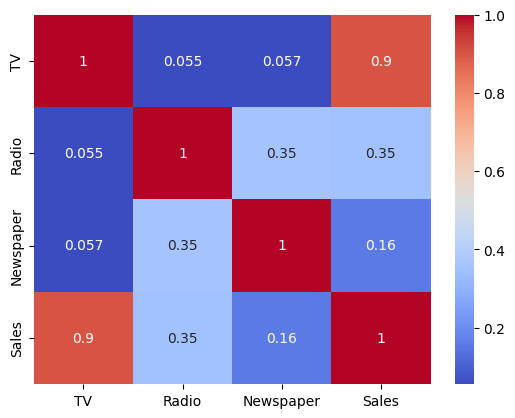

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [13]:
#train the model
from sklearn.model_selection import train_test_split
x=data.drop(columns='Sales')
y=data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [14]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=3)
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=3)

In [15]:
# Make predictions on the test data
y_pred_tree = tree_model.predict(x_test)

In [16]:
# Evaluate the Decision Tree model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

In [17]:
# Print evaluation metrics
print(f"Decision Tree - Mean Absolute Error (MAE): {mae_tree}")
print(f"Decision Tree - Mean Squared Error (MSE): {mse_tree}")
print(f"Decision Tree - Root Mean Squared Error (RMSE): {rmse_tree}")
print(f"Decision Tree - R² Score: {r2_tree}")

Decision Tree - Mean Absolute Error (MAE): 1.1600000000000001
Decision Tree - Mean Squared Error (MSE): 2.562333333333333
Decision Tree - Root Mean Squared Error (RMSE): 1.6007290005910848
Decision Tree - R² Score: 0.9207006375997475


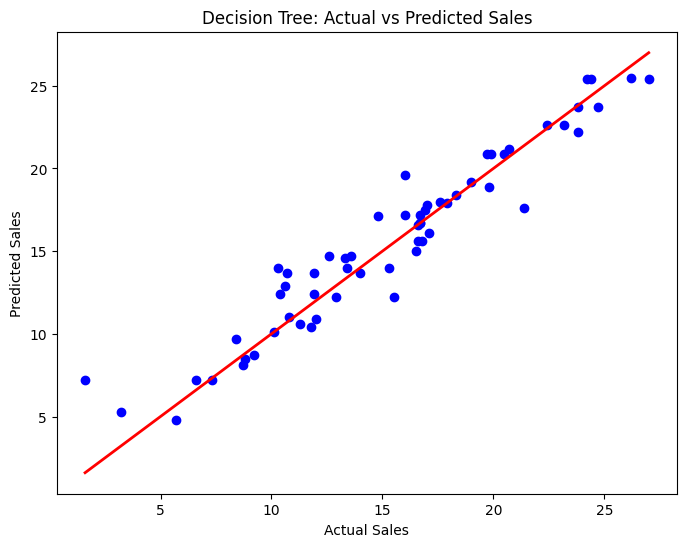

In [18]:
# Scatter plot of actual vs predicted sales for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Decision Tree: Actual vs Predicted Sales')
plt.show()

In [19]:
# Decision Tree model accuracy
accuracy_tree = tree_model.score(x_test, y_test) * 100
print(f"Accuracy of Decision Tree model: {accuracy_tree}%")

Accuracy of Decision Tree model: 92.07006375997476%


Predicted future sales with Decision Tree: [25.5 25.5 25.5]


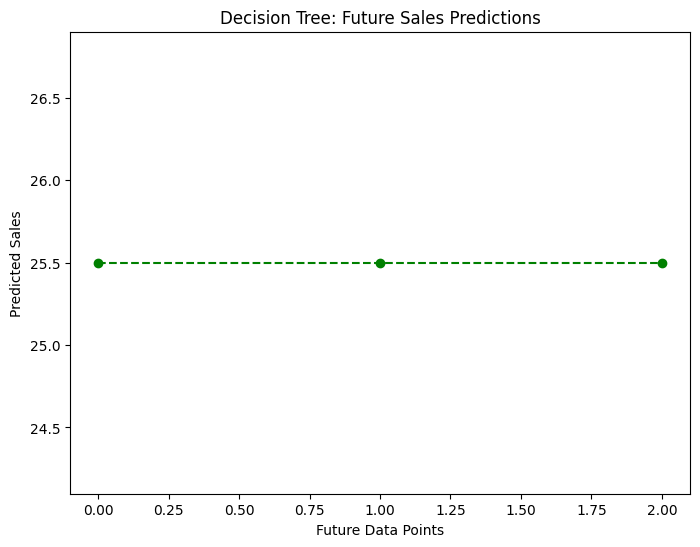

In [21]:
#Future Prediction with Decision Tree


# Create a dataset for future predictions
x_future = pd.DataFrame({
    'TV': [1000, 1500, 2000],
     'Radio': [200, 300, 400],
    'Newspaper': [100, 150, 200],

})

# Predict future sales using the Decision Tree model
future_sales_pred_tree = tree_model.predict(x_future)

# Print future predictions
print(f"Predicted future sales with Decision Tree: {future_sales_pred_tree}")

# Optional: You can plot the future sales predictions
plt.figure(figsize=(8, 6))
plt.plot(future_sales_pred_tree, color='green', marker='o', linestyle='dashed')
plt.title('Decision Tree: Future Sales Predictions')
plt.xlabel('Future Data Points')
plt.ylabel('Predicted Sales')
plt.show()
